In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
corolla18 = pd.read_excel('toyota_corolla_2019.ods',parse_dates=['Date of sale'])

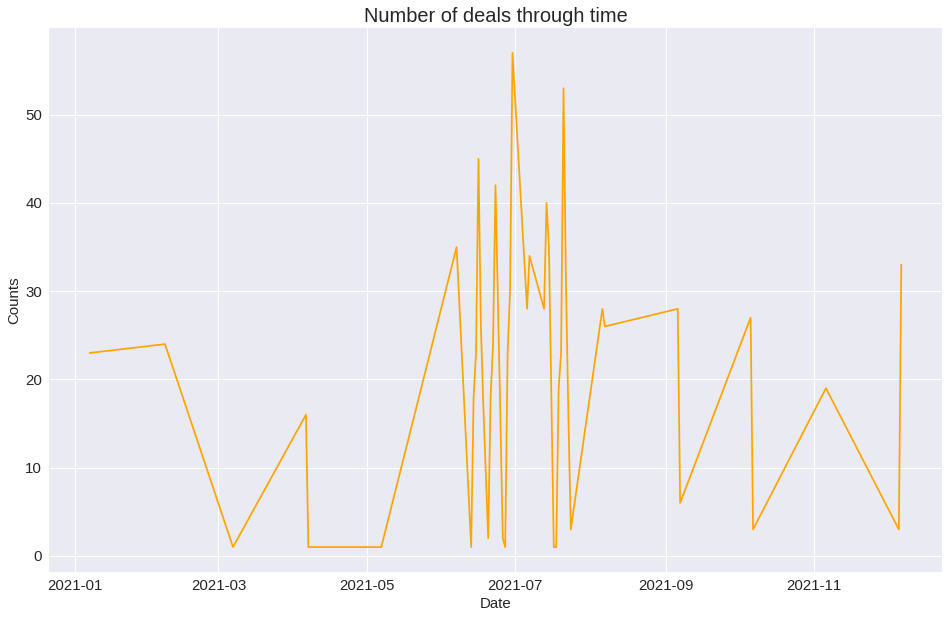

In [4]:
values = corolla18['Date of sale'].value_counts()
data = {}
for i in range(len(values)):
    data[values.index[i]]=values[i]
data = dict(sorted(data.items()))

plt.style.use('seaborn')
fig = plt.figure(figsize=(16,10))
plt.plot(data.keys(),data.values(),color='orange')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Number of deals through time',fontsize=20)
plt.show()
fig.savefig('Number_of_deals_through_time.jpg')

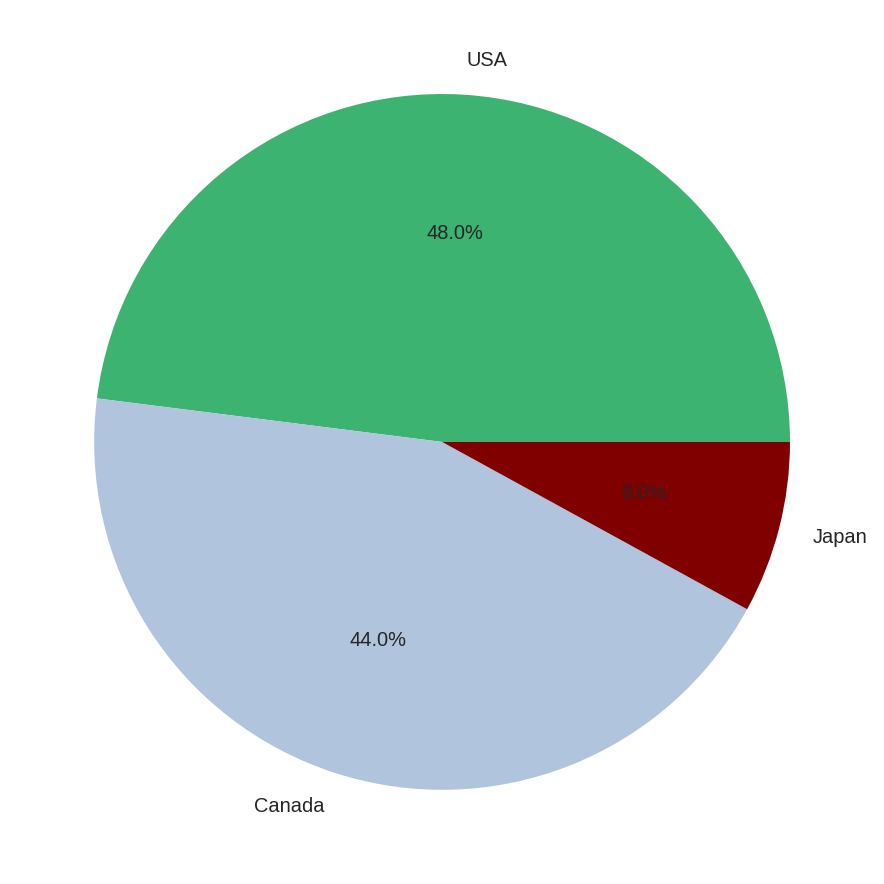

In [8]:
def func(string):
    if string[0]=='J':
        return 'Japan'
    elif string[0]=='2':
        return 'Canada'
    elif string[0]=='5':
        return 'USA'
    else:
        return None
data = corolla18['VIN'].apply(func)
fig = plt.figure(figsize=(20,16))
plt.pie(data.value_counts(),labels=data.value_counts().index.to_list(),autopct='%1.1f%%',textprops={'fontsize':20},colors=['mediumseagreen','lightsteelblue','maroon'])
plt.show()
fig.savefig('Ratio_by_country_manufacturers.jpg')

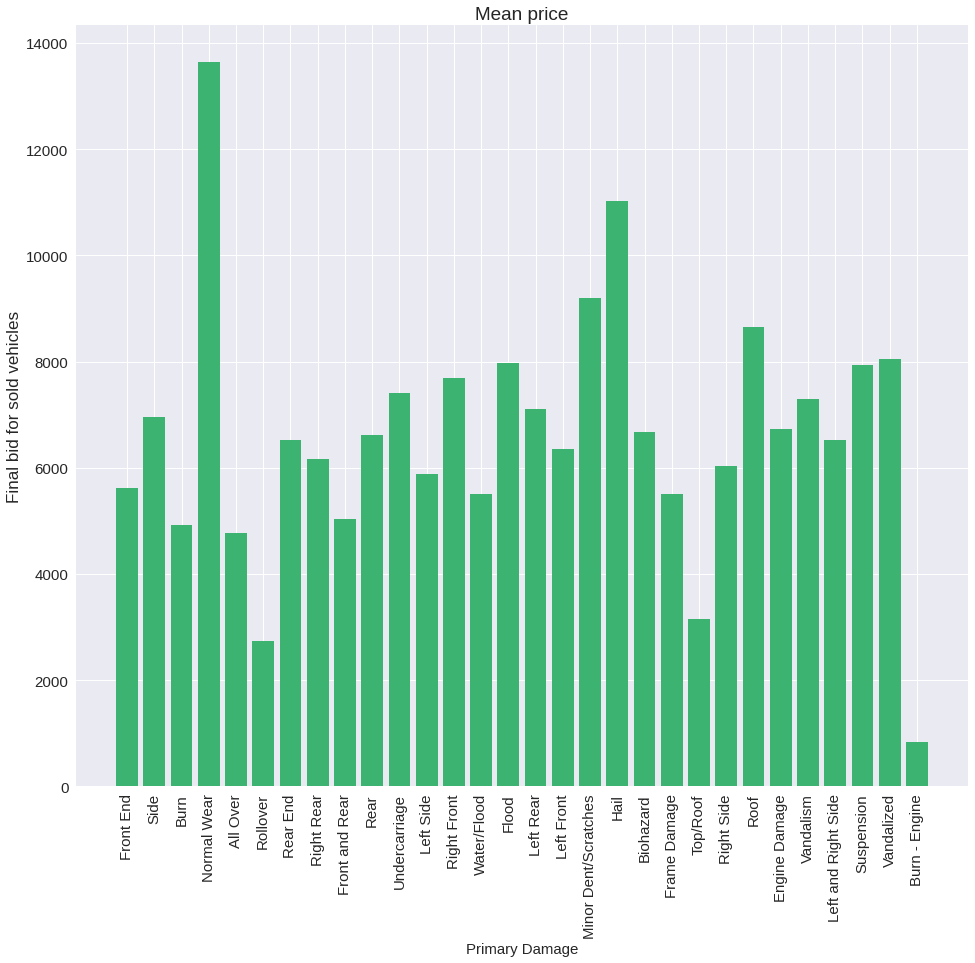

In [15]:
fig = plt.figure(figsize=(16,14))
x = corolla18[corolla18['Sold status']=='Sold']['Primary Damage']
y=[]
for dmg in x:
    y.append(corolla18[(corolla18['Sold status']=='Sold') & (corolla18['Primary Damage']==dmg)]['Final bid'].mean())
plt.bar(x,y,color='mediumseagreen')
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Primary Damage',fontsize=15)
plt.ylabel('Final bid for sold vehicles',fontsize=17)
plt.title('Mean price',fontsize=19)
plt.show()
fig.savefig('Mean_price_of_sold_cars.jpg')

J
(61,)
2
(304,)
5
(341,)


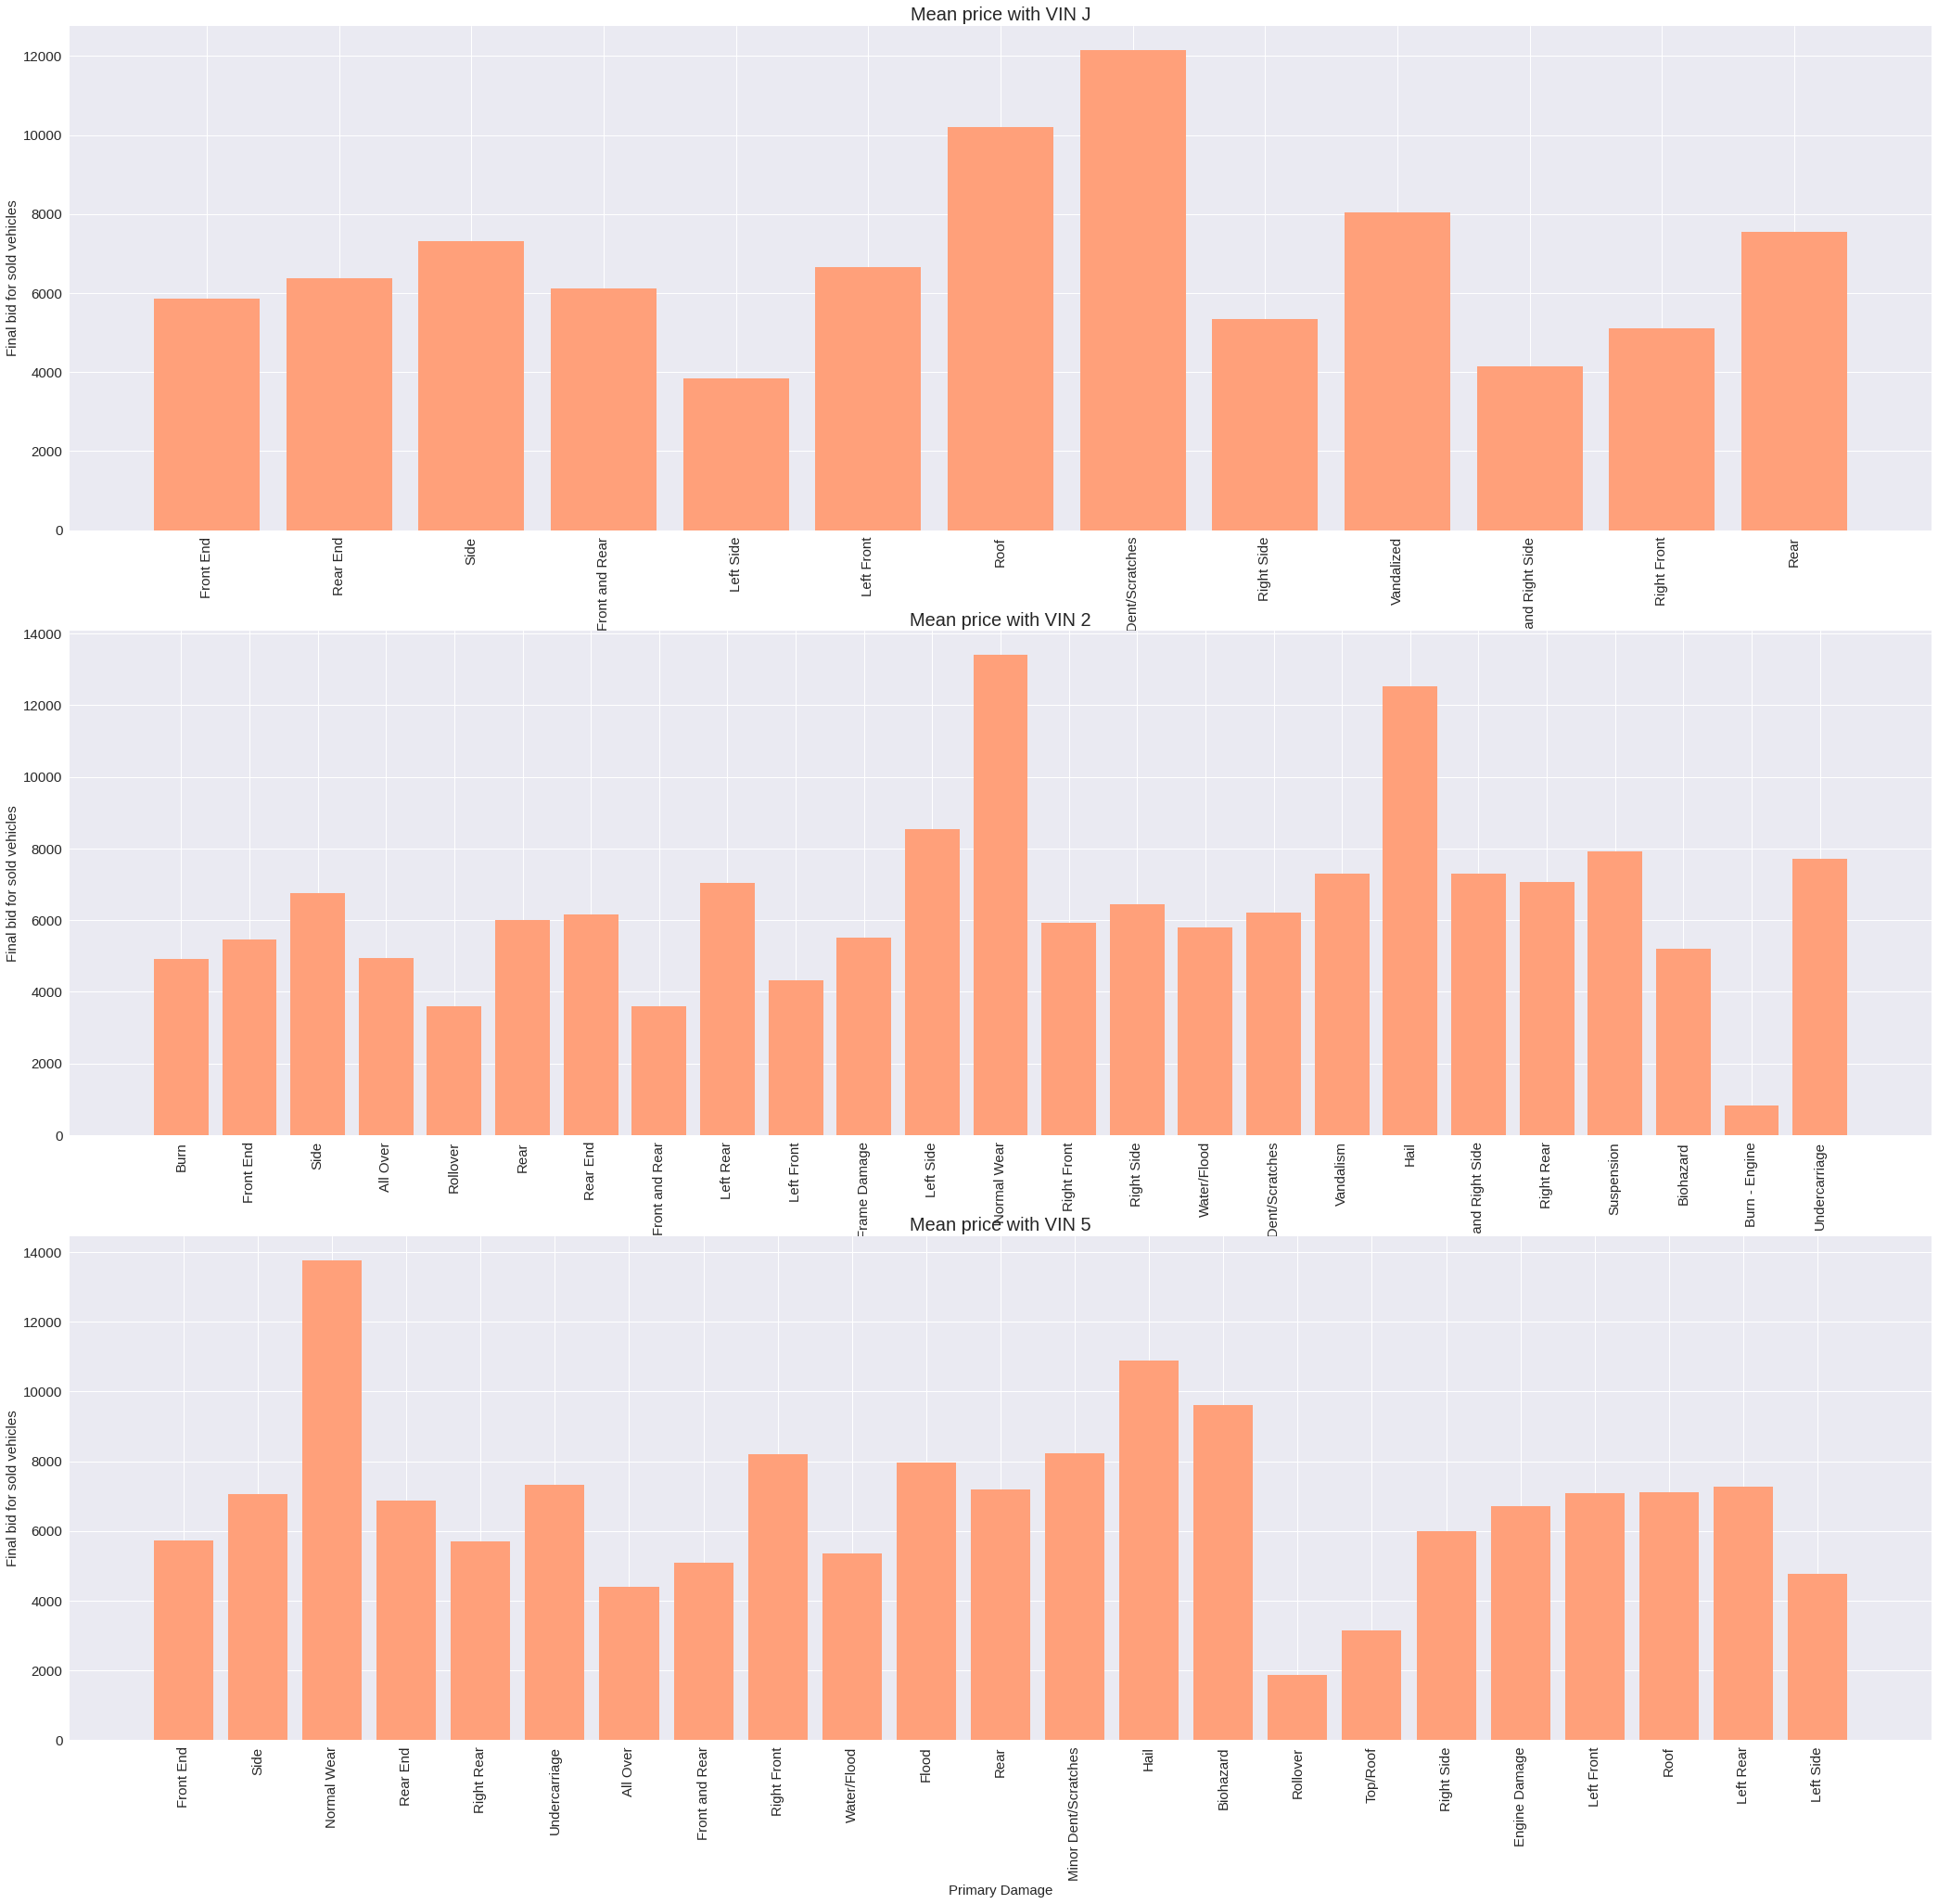

In [17]:
fig = plt.figure(1,figsize=(36,34))
vins = ['J','2','5']
count = 1
for VIN in vins:
    print(VIN)
    x = corolla18[(corolla18['Sold status']=='Sold') & (corolla18['VIN'].str.startswith(VIN))]['Primary Damage']
    y=[]
    for dmg in x:
        y.append(corolla18[(corolla18['Sold status']=='Sold') & (corolla18['Primary Damage']==dmg) & (corolla18['VIN'].str.startswith(VIN))]['Final bid'].mean())
    plt.subplot(int(str(31)+str(count)))
    print(x.shape)
    plt.bar(x,y,color='lightsalmon')
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Primary Damage',fontsize=15)
    plt.ylabel('Final bid for sold vehicles',fontsize=15)
    plt.title(f'Mean price with VIN {VIN}',fontsize=20)
    count+=1
plt.show()
fig.savefig('Mean_price_of_sold_cars_by_VIN.jpg')

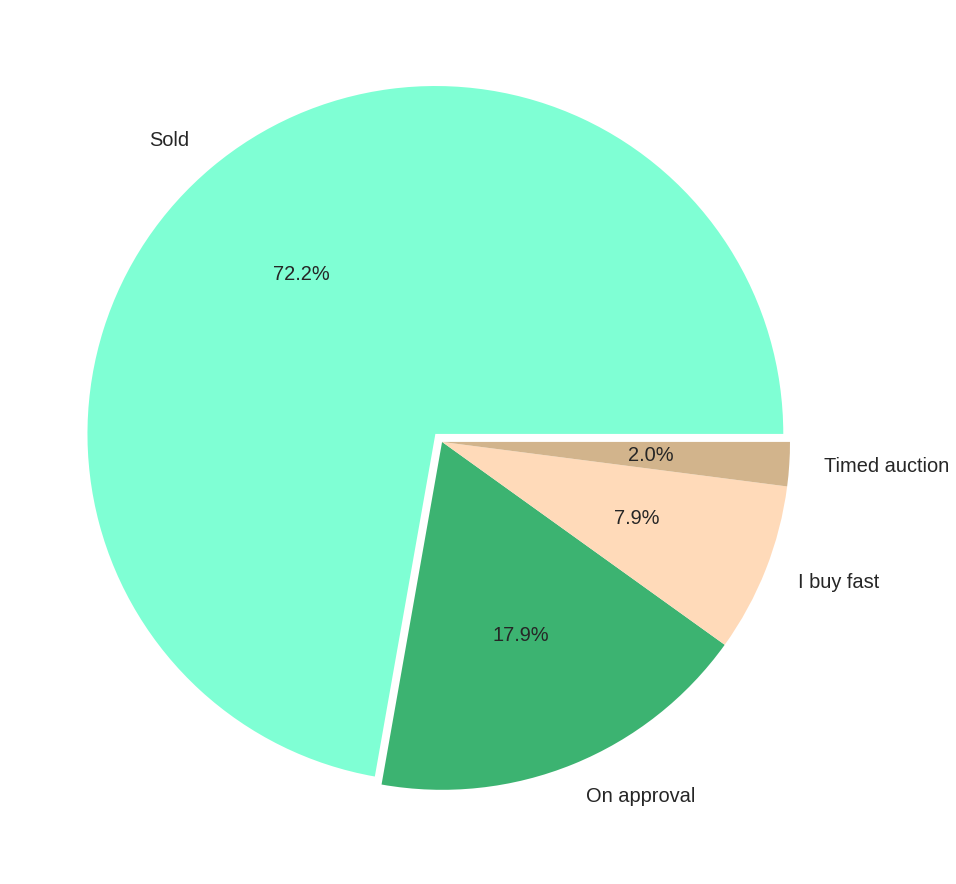

In [21]:
data = corolla18['Sold status']
plt.figure(figsize=(20,16))
pie = plt.pie(data.value_counts(),labels=data.value_counts().index.to_list(),autopct='%1.1f%%',explode=[0.03,0,0,0],colors=['aquamarine','mediumseagreen','peachpuff','tan'],textprops={'size':20})
plt.savefig('Sold_status.jpg')

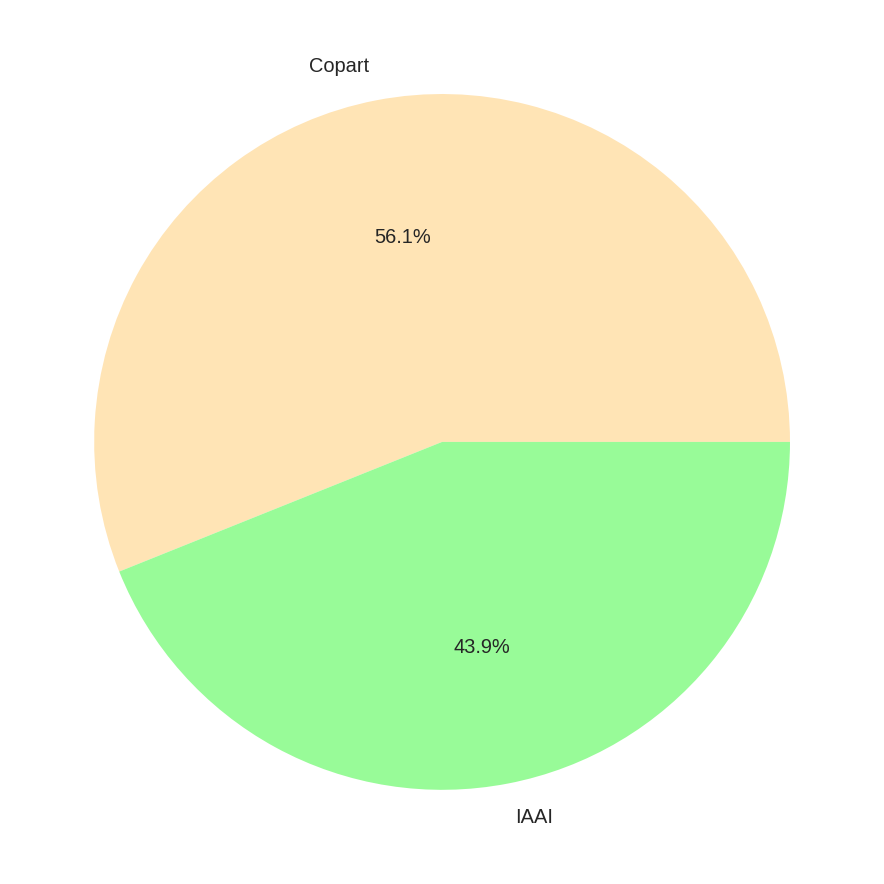

In [24]:
data = corolla18['Auction']
plt.figure(figsize=(20,16))
plt.pie(data.value_counts(),labels=data.value_counts().index.to_list(),autopct='%1.1f%%',explode=[0,0],colors=['moccasin','palegreen'],textprops={'size':20})
plt.savefig('Auctions.jpg')

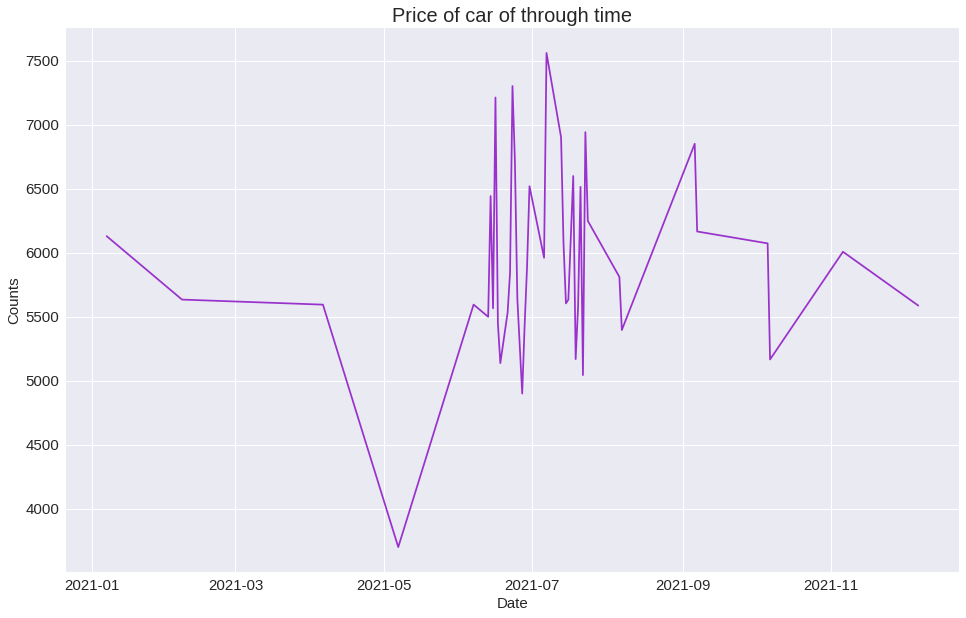

In [29]:
dates = corolla18[corolla18['Sold status']=='Sold']['Date of sale'].value_counts().index
data = {}
for index in dates:
    data[index]=corolla18[(corolla18['Sold status']=='Sold') & (corolla18['Date of sale']==index)]['Final bid'].mean()
data = dict(sorted(data.items()))
"""for (k,v) in data.items():
    print(k,v)"""
plt.style.use('seaborn')
fig = plt.figure(figsize=(16,10))
plt.plot(data.keys(),data.values(),color='darkorchid')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Price of car of through time',fontsize=20)
plt.show()
fig.savefig('Price_of_sold_car_through_time.jpg')

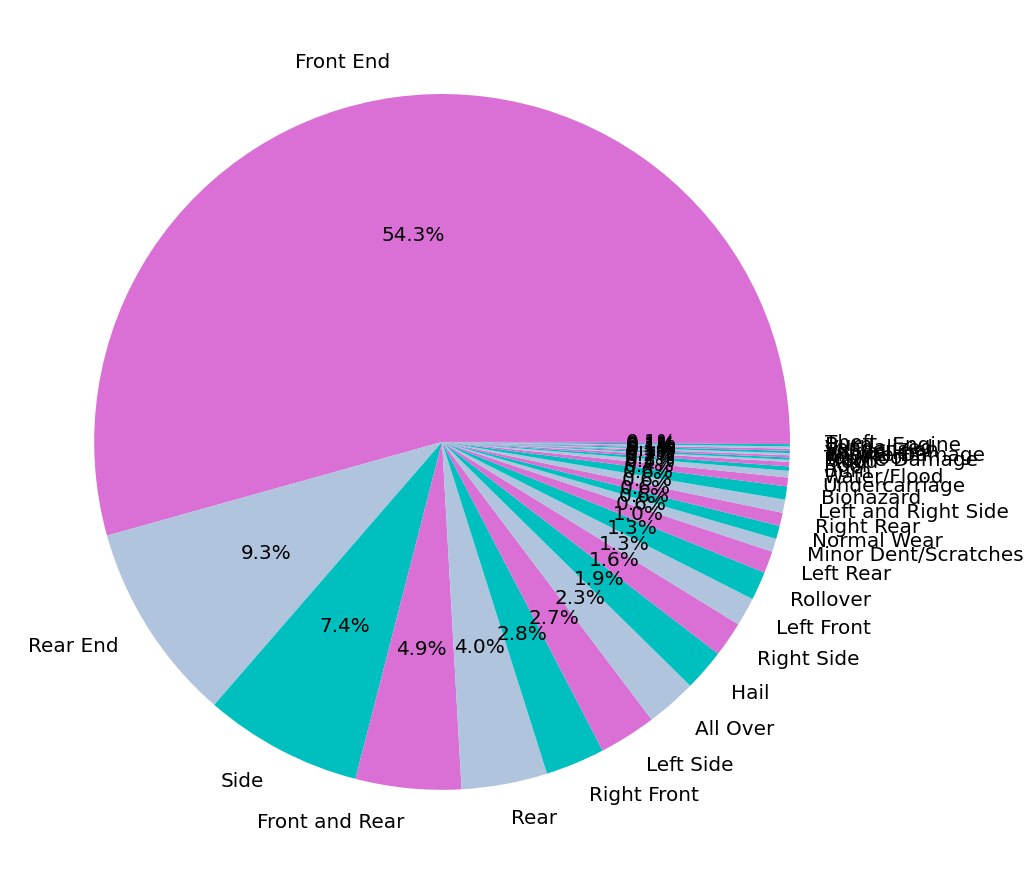

In [3]:
data = corolla18['Primary Damage']
fig=plt.figure(figsize=(20,16))
plt.pie(data.value_counts(),labels=data.value_counts().index.to_list(),autopct='%1.1f%%',textprops={'fontsize':20},colors=['orchid','lightsteelblue','c'])
plt.show()
#fig.savefig('Ratio_by_country_manufacturers.jpg')

In [4]:
len(corolla18[corolla18['Primary Damage']=="Hail"])

19

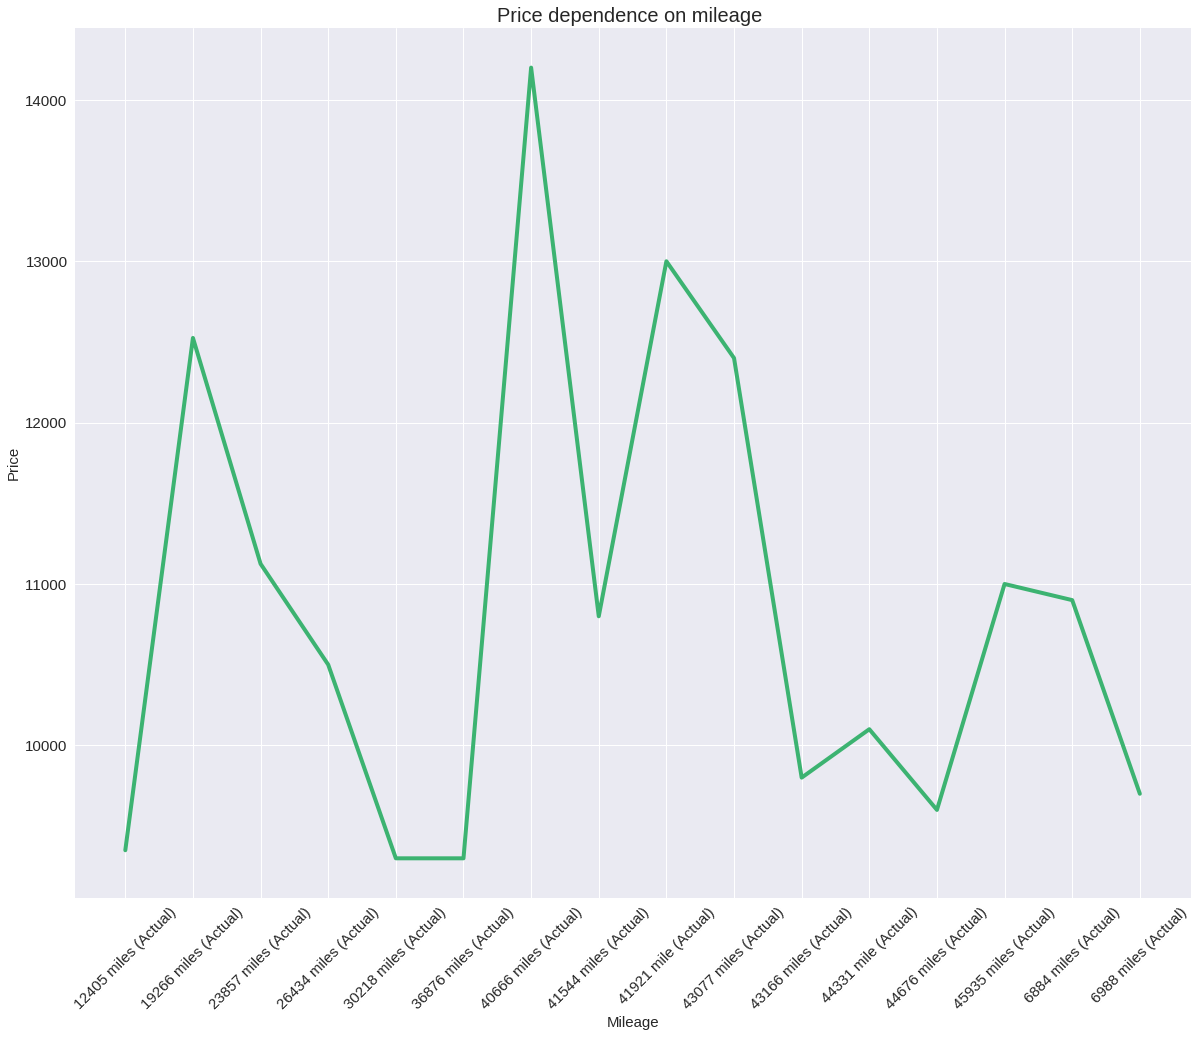

In [12]:
mileages = corolla18[corolla18['Primary Damage']=="Hail"]['Mileage'].value_counts().index
data = {}
for miles in mileages:
    data[miles]=corolla18[(corolla18['Primary Damage']=="Hail") & (corolla18['Mileage']==miles)]['Final bid'].mean()
data = dict(sorted(data.items()))
plt.style.use('seaborn')
fig=plt.figure(figsize=(20,16))
plt.xlabel('Mileage',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.title('Price dependence on mileage ',fontsize=20)
plt.plot(data.keys(),data.values(),color='mediumseagreen',linewidth=4)
fig.savefig('Price_dependence_on_mileage(Hail_primary_damage)_2019.jpg')

In [8]:
len(corolla18[(corolla18['Primary Damage']=="Hail") & (corolla18['Sold status']=='Sold')])

13